In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import collections
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import openpyxl
from openpyxl import load_workbook
import nltk
nltk.download('all')
from pprint import pprint

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [6]:
wb = load_workbook('/content/drive/My Drive/Voxaer/Voxaer.xlsx')

In [7]:
ws = wb.get_sheet_by_name('Form Responses 1')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  """Entry point for launching an IPython kernel.


# **What were some of the easier parts of the gameplay to understand?[Cell C]**

**Word Frequency**

In [8]:
#Easy Part Question Word Frequency pprint(nltk.word_tokenize(text), width=79, compact=True)
easierPartText = ''
for cell in ws['C'][1:]:
   easierPartText = easierPartText + ' ' + cell.value

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
result_list = tokenizer.tokenize(easierPartText)

stopwords = nltk.corpus.stopwords.words("english")
result_list = [w for w in result_list if w.lower() not in stopwords]

In [9]:
word_counts = collections.Counter(result_list)
word_counts_top100 = word_counts.most_common(100)
print(word_counts_top100)

[('understand', 14), ('easy', 13), ('attack', 11), ('game', 9), ('controls', 9), ('rhythm', 8), ('hit', 8), ('different', 7), ('keys', 6), ('players', 5), ('key', 4), ('buttons', 4), ('need', 4), ('tutorial', 4), ('use', 4), ('clear', 4), ('Press', 4), ('defense', 4), ('UI', 3), ('two', 3), ('play', 3), ('click', 3), ('heal', 3), ('collect', 3), ('make', 3), ('beat', 3), ('notes', 3), ('easier', 3), ('move', 3), ('press', 3), ('block', 3), ('match', 3), ('concept', 3), ('mechanism', 3), ('skills', 3), ('good', 3), ('button', 3), ('nice', 2), ('aspect', 2), ('trying', 2), ('W', 2), ('Catching', 2), ('shield', 2), ('three', 2), ('Mechanics', 2), ('combos', 2), ('AI', 2), ('needed', 2), ('skill', 2), ('type', 2), ('2', 2), ('ground', 2), ('opponent', 2), ('want', 2), ('box', 2), ('powerups', 2), ('instructions', 1), ('fighting', 1), ('people', 1), ('bet', 1), ('attacks', 1), ('arrows', 1), ('function', 1), ('way', 1), ('Simple', 1), ('know', 1), ('wasd', 1), ('intuitive', 1), ('either', 1

In [10]:
my_cloud = WordCloud(
    background_color='white',
    width=900, height=600,
    max_words=100,            
    max_font_size=99,         
    min_font_size=16,         
    random_state=50           
).generate_from_frequencies(word_counts)

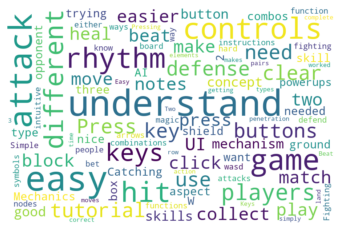

In [11]:
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Sentiment Analysis**

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
pos_value_total = 0
neu_value_total = 0
neg_value_total = 0
count = 0
for cell in ws['C'][1:]:
  pos_value = sia.polarity_scores(cell.value)['pos']
  pos_value_total = pos_value + pos_value_total
  
  neu_value = sia.polarity_scores(cell.value)['neu']
  neu_value_total = neu_value + neu_value_total

  neg_value = sia.polarity_scores(cell.value)['neg']
  neg_value_total = neg_value + neg_value_total

  count = count + 1

pprint("The average positive sentiment for this question is: " + str(pos_value_total/count))
pprint("The average neutral sentiment for this question is: " + str(neu_value_total/count))
pprint("The average negative sentiment for this question is: " + str(neg_value_total/count))

'The average positive sentiment for this question is: 0.1498205128205128'
'The average neutral sentiment for this question is: 0.779371794871795'
'The average negative sentiment for this question is: 0.07076923076923078'


# **What were some of the harder parts of gameplay to understand/use?[Cell D]**

**Word Frequency**

In [13]:
#Easy Part Question Word Frequency pprint(nltk.word_tokenize(text), width=79, compact=True)
easierPartText = ''
for cell in ws['D'][1:]:
   easierPartText = easierPartText + ' ' + cell.value

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
result_list = tokenizer.tokenize(easierPartText)

stopwords = nltk.corpus.stopwords.words("english")
result_list = [w for w in result_list if w.lower() not in stopwords]

In [14]:
word_counts = collections.Counter(result_list)
word_counts_top100 = word_counts.most_common(100)
print(word_counts_top100)

[('attack', 18), ('game', 14), ('understand', 13), ('hard', 13), ('button', 9), ('press', 9), ('get', 8), ('use', 7), ('different', 7), ('key', 7), ('attacks', 6), ('hit', 6), ('perfect', 6), ('tutorial', 6), ('difference', 5), ('sure', 5), ('timing', 5), ('player', 4), ('strategy', 4), ('win', 4), ('exactly', 4), ('rhythm', 4), ('physical', 4), ('bar', 4), ('time', 4), ('defense', 4), ('heal', 4), ('players', 3), ('easy', 3), ('clear', 3), ('match', 3), ('defend', 3), ('spam', 3), ('health', 3), ('first', 3), ('need', 3), ('blocks', 3), ('block', 3), ('box', 3), ('used', 3), ('move', 3), ('would', 3), ('really', 3), ('four', 3), ('None', 3), ('difficult', 3), ('magic', 3), ('seems', 3), ('think', 3), ('power', 3), ('took', 3), ('keys', 3), ('like', 3), ('white', 3), ('chose', 3), ('know', 3), ('differences', 2), ('happens', 2), ('make', 2), ('correctly', 2), ('point', 2), ('could', 2), ('options', 2), ('magical', 2), ('land', 2), ('score', 2), ('side', 2), ('notes', 2), ('winning', 2)

In [15]:
my_cloud = WordCloud(
    background_color='white',
    width=900, height=600,
    max_words=100,            
    max_font_size=99,         
    min_font_size=16,         
    random_state=50           
).generate_from_frequencies(word_counts)

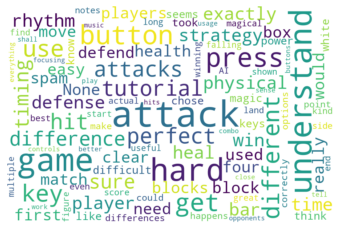

In [16]:
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Sentiment Analysis**

In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
pos_value_total = 0
neu_value_total = 0
neg_value_total = 0
count = 0
for cell in ws['D'][1:]:
  pos_value = sia.polarity_scores(cell.value)['pos']
  pos_value_total = pos_value + pos_value_total
  
  neu_value = sia.polarity_scores(cell.value)['neu']
  neu_value_total = neu_value + neu_value_total

  neg_value = sia.polarity_scores(cell.value)['neg']
  neg_value_total = neg_value + neg_value_total

  count = count + 1

pprint("The average positive sentiment for this question is: " + str(pos_value_total/count))
pprint("The average neutral sentiment for this question is: " + str(neu_value_total/count))
pprint("The average negative sentiment for this question is: " + str(neg_value_total/count))

'The average positive sentiment for this question is: 0.12326923076923077'
'The average neutral sentiment for this question is: 0.7703333333333333'
'The average negative sentiment for this question is: 0.10637179487179488'


# **What aspects of the game would you be interested in playing more of?**

[('would', 14), ('game', 14), ('different', 14), ('music', 11), ('play', 11), ('AI', 8), ('attack', 7), ('levels', 7), ('interested', 6), ('combos', 6), ('like', 6), ('interesting', 5), ('part', 5), ('songs', 5), ('beats', 5), ('fun', 4), ('strategy', 4), ('fast', 4), ('shield', 4), ('power', 4), ('fighting', 3), ('really', 3), ('rhythm', 3), ('maybe', 3), ('better', 3), ('think', 3), ('combination', 3), ('rhythms', 3), ('player', 3), ('physical', 3), ('skills', 3), ('song', 3), ('slow', 3), ('also', 3), ('heal', 3), ('much', 2), ('typing', 2), ('aspect', 2), ('way', 2), ('make', 2), ('friend', 2), ('system', 2), ('attacking', 2), ('combo', 2), ('something', 2), ('instead', 2), ('elements', 2), ('beat', 2), ('help', 2), ('im', 2), ('keys', 2), ('trying', 2), ('skill', 2), ('types', 2), ('players', 2), ('love', 2), ('Also', 2), ('magic', 2), ('type', 2), ('defense', 2), ('action', 2), ('blocks', 2), ('cool', 2), ('could', 2), ('ups', 2), ('didnt', 1), ('Great', 1), ('sounds', 1), ('ways

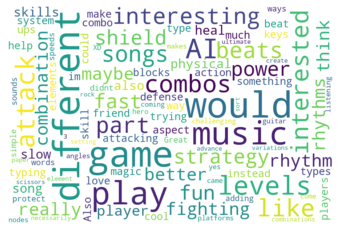

In [18]:
#Word Frequency
aspectPartText = ''
for cell in ws['F'][1:]:
   aspectPartText = aspectPartText + ' ' + cell.value

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
result_list = tokenizer.tokenize(aspectPartText)

stopwords = nltk.corpus.stopwords.words("english")
result_list = [w for w in result_list if w.lower() not in stopwords]

word_counts = collections.Counter(result_list)
word_counts_top100 = word_counts.most_common(100)
print(word_counts_top100)


my_cloud = WordCloud(
    background_color='white',
    width=900, height=600,
    max_words=100,            
    max_font_size=99,         
    min_font_size=16,         
    random_state=50           
).generate_from_frequencies(word_counts)

plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
#Sentiment Analysis
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
pos_value_total = 0
neu_value_total = 0
neg_value_total = 0
count = 0
for cell in ws['F'][1:]:
  pos_value = sia.polarity_scores(cell.value)['pos']
  pos_value_total = pos_value + pos_value_total
  
  neu_value = sia.polarity_scores(cell.value)['neu']
  neu_value_total = neu_value + neu_value_total

  neg_value = sia.polarity_scores(cell.value)['neg']
  neg_value_total = neg_value + neg_value_total

  count = count + 1

pprint("The average positive sentiment for this question is: " + str(pos_value_total/count))
pprint("The average neutral sentiment for this question is: " + str(neu_value_total/count))
pprint("The average negative sentiment for this question is: " + str(neg_value_total/count))

'The average positive sentiment for this question is: 0.17005128205128203'
'The average neutral sentiment for this question is: 0.7316410256410257'
'The average negative sentiment for this question is: 0.09829487179487181'


# **What parts of the game could be improved - and why?**

[('game', 24), ('think', 14), ('would', 13), ('attack', 12), ('different', 11), ('players', 10), ('tutorial', 10), ('add', 9), ('use', 9), ('hit', 9), ('could', 9), ('notes', 8), ('two', 8), ('perfect', 7), ('maybe', 6), ('2', 6), ('physical', 6), ('like', 6), ('time', 6), ('hard', 6), ('player', 6), ('make', 6), ('Maybe', 6), ('magic', 6), ('beats', 6), ('music', 5), ('strategy', 5), ('skills', 5), ('AI', 5), ('fun', 5), ('rhythm', 5), ('seems', 5), ('good', 5), ('understand', 5), ('win', 5), ('etc', 4), ('keys', 4), ('animations', 4), ('buttons', 4), ('playing', 4), ('key', 4), ('color', 4), ('need', 4), ('button', 4), ('attacks', 4), ('great', 3), ('effects', 3), ('adding', 3), ('away', 3), ('instead', 3), ('hitting', 3), ('really', 3), ('much', 3), ('match', 3), ('characters', 3), ('help', 3), ('get', 3), ('improved', 3), ('ability', 3), ('penalty', 3), ('miss', 3), ('4', 3), ('1', 3), ('pressing', 3), ('first', 3), ('attacking', 3), ('skill', 2), ('functions', 2), ('work', 2), ('s

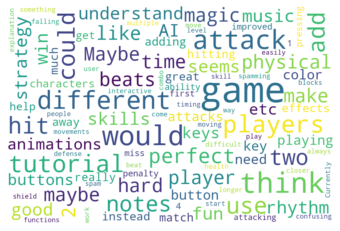

In [20]:
#Word Frequency
improvedPartText = ''
for cell in ws['G'][1:]:
   improvedPartText = improvedPartText + ' ' + cell.value

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
result_list = tokenizer.tokenize(improvedPartText)

stopwords = nltk.corpus.stopwords.words("english")
result_list = [w for w in result_list if w.lower() not in stopwords]

word_counts = collections.Counter(result_list)
word_counts_top100 = word_counts.most_common(100)
print(word_counts_top100)


my_cloud = WordCloud(
    background_color='white',
    width=900, height=600,
    max_words=100,            
    max_font_size=99,         
    min_font_size=16,         
    random_state=50           
).generate_from_frequencies(word_counts)

plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
#Sentiment Analysis
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
pos_value_total = 0
neu_value_total = 0
neg_value_total = 0
count = 0
for cell in ws['G'][1:]:
  pos_value = sia.polarity_scores(cell.value)['pos']
  pos_value_total = pos_value + pos_value_total
  
  neu_value = sia.polarity_scores(cell.value)['neu']
  neu_value_total = neu_value + neu_value_total

  neg_value = sia.polarity_scores(cell.value)['neg']
  neg_value_total = neg_value + neg_value_total

  count = count + 1

pprint("The average positive sentiment for this question is: " + str(pos_value_total/count))
pprint("The average neutral sentiment for this question is: " + str(neu_value_total/count))
pprint("The average negative sentiment for this question is: " + str(neg_value_total/count))

'The average positive sentiment for this question is: 0.12707692307692306'
'The average neutral sentiment for this question is: 0.7879230769230768'
'The average negative sentiment for this question is: 0.0849871794871795'
